In [ ]:
# Convert h5(keras) to SavedModel format
# import datetime, os
from tensorflow import keras

model = keras.models.load_model('supercombo.keras')
model.save('./supercombo', save_format="tf")

In [ ]:
# Import model to TensorBoard
%run import_pb_to_tensorboard --model_dir ./supercombo/saved_model.pb --log_dir ./tmp/tensorflow_logdir

In [ ]:
# Visualize model
!tensorboard --logdir=./tmp/tensorflow_logdir

In [3]:
# Load the saved model
import tensorflow as tf

keras_model = tf.keras.models.load_model('./supercombo')

# get input, output node names for the TF graph from the Keras model
# print(keras_model.inputs)
# print(keras_model.input_shape) # [(None, 12, 128, 256), (None, 8), (None, 512)]
print(keras_model.summary())

input_name = keras_model.inputs[0].name.split(':')[0]
keras_output_node_name = keras_model.outputs[0].name.split(':')[0]
graph_output_node_name = keras_output_node_name.split('/')[-1]

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
vision_input_imgs (InputLayer)  [(None, 12, 128, 256 0                                            
__________________________________________________________________________________________________
vision_permute (Permute)        (None, 128, 256, 12) 0           vision_input_imgs[0][0]          
__________________________________________________________________________________________________
vision_conv2d (Conv2D)          (None, 128, 256, 16) 4816        vision_permute[0][0]             
__________________________________________________________________________________________________
vision_elu (ELU)                (None, 128, 256, 16) 0           vision_conv2d[0][0]              
____________________________________________________________________________________________

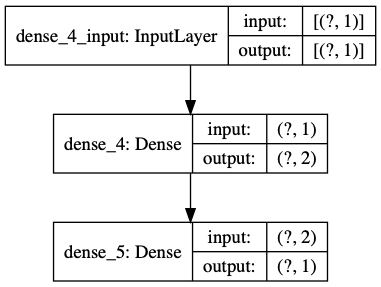

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Convert to CoreML
import tfcoreml

model = tfcoreml.convert('./supercombo',
                         mlmodel_path='./supercombo.mlmodel',
                         input_name_shape_dict={'vision_input_imgs': (1, 12, 128, 256),
                                               'desire': (1, 8),
                                               'rnn_state': (1, 512)},
                         output_feature_names=[graph_output_node_name],
                         minimum_ios_deployment_target='13')